# Decision tree
Consider a set with a set of categorical features $X_i$, e.g., attributes of a cat. Decision tree model, an output of a training process, consitis of **nodes**.
- **Root node**
- **Branch** consists of decision nodes and a leaf node
- **Decision nodes** - Other non-final nodels 
- **Leaf nodels** - final nodes that make a prediction

## Building a tree

Consider what feature to use at a nodes. 

Maximize _purity_ (min. _impurity_)  after a nodes the split is as good as possible is separating the labels. 
The algorithm has to _choose_ which feature (from given) givens the highest _purity_. 

When to stop splitting. 
- When node gives $100%$ one class
- When tree exceeds maximum depth
- When improvements in purity become negligeble or reverse. 
- When a number of examples on a node becomes too small 

## Entropy

> Entropy function is a measure of impurity of a set of data $H(p)\in(0,1)$.

Consider a fraction of label $1$, in a set of examples $p_1$. 
Entropy function $H(p_1)$. It has a maximum at $p_1=0.5$ and minimum $H(p_1)=0$ if $p_1=0$. It is a bell-sheped function. 
For another label $0$, if there are only $2$ labels, then $p(0)=1-p_1$, and 
$$
H(p_1) = -p_1 \log_2(p_1) - p_2\log(p_0) \\
= -p_1\log_2(p_1) - (1-p_1)\log(1-p_1) 
$$
**Note** similarity with logistic regression loss function.  
**Note** there is also _Gini_ criterion for decision trees. 

## Choosing how to split: 

> Reduction of entropy is an information gane

Consider a _weighted average_ of entropy after one node of a decision tree.  
Consider a _information gain_ which is a reduction in entropy (previos node, minus current node). (this allows to find when reduction in entropy becomes too small)

Consider $p_1^{l}$ and $w^l$ (a fraction of examples that went left) for left and $p^r$ with $w^r$. E.g., if 5/10 examples went left and right than, 
$p_1^l=4/5$ with $w^l=5/10$ and $p_1^r=1/5$ with $w^r=5/10$ (5 labels are of category $1$). 

Consider also $p_1^{\rm root}$ at the begitting of the node.  
Than the information gain:  
$$
H(p_1^{\rm root}) - \Big( w^{\rm left} H(p_1^{\rm left}) + w^{\rm right}H(p_1^{\rm right}) \Big)
$$

## Large decision trees
1. Consider all training examples at a root node
2. Compute _information gain_ for all possible features and pick the one with the highest information gain.
3. Split the data into two subsets and create left and right branches of the tree. This gives the split at a root node. 
4. Consider both branges and repeat the process of spliting. 
5. Stop when 
- a node gives $100\%$ of a class 
- when maximum depth is exceeded, 
- when information gain is too small, 
- when number of train examples is too small

If after splitting there is an equal amount of both classess - the information gain is zero. 
Once the information gain is maximum $(1)$, we stop splitting this branch, and continuing with the remaining branches.

Note that by splitting the dataset at each node into two brunches and than dealing with only a subset of the training data on this branch is called `recursive algorithm`. 

> Building a decision tree requires a recursive algorithm (the algorithm that is calling itself)




# Decision Tree learning

What if there are more than $2$ values for a feature (multiple categories)  
This requires to 
- Build a miltiple branch splitting (each branch for each value of the feature)
- Using ``one-hot-encoding`

The one-hot enconding is done by converting $N$ values of a feature into $N$ features that has values of $1$ or $0$ (yes or no). This allows to use already designed algorithms. 

# Continous valued features

One can yse the value (_threshhold_) to split the dataset into two based on where the value of the feature lie with respect to the chosen value. This allows to compute the information gain of this splitting.  
Multiple values can be tired untill one that gives the largest information gain is foung. 

# Regression Trees

Now consider that the continous value is a label of our dataset. The prediction is done via a decision tree and finding set of values for a given group taht gives maximum entropy. After, you average the values to get a final prediciton. 

> Instead of reducing the entropy, try redicing the variance of the values

The evaluate the quiality of the split, compute the $w^{\rm left} = 5/10$ and $w^{\rm right} = 5/10$ and `average variacne` is $w^{\rm left}\times\sigma^{\rm left} + w^{\rm right}\times \sigma^{\rm right}$  
This is similar to the `wieghted average entropy` used before. 

> Chose a split with a **smallest** average variance

And as before consider the decrease in average variance, `reduction of average variance`. 



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

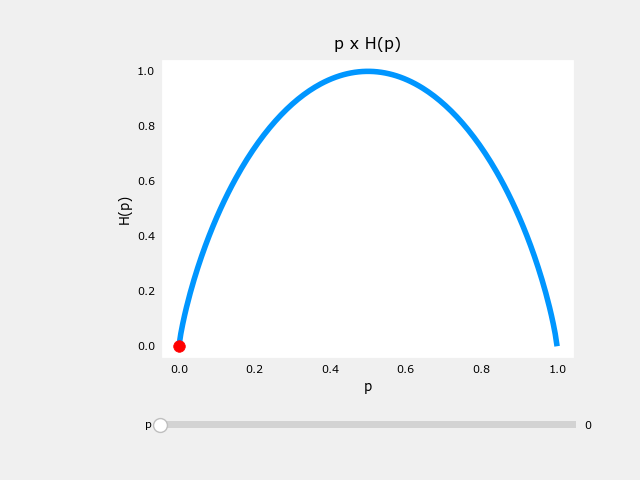

In [19]:
%matplotlib widget
_ = plot_entropy()

In [20]:
# Define training data (one-hot encoding)

X_train = np.array([[1, 1, 1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

# define entropy function
def entropy(p):
    if p == 0 or p == 1:
        return 0
    else:
        return -p * np.log2(p) - (1- p)*np.log2(1 - p)
    
# define how to split dataset (e.g.,  node)
def split_indices(X, index_feature):
    """Given a dataset and a index feature, return two lists for the two split nodes, the left node has the animals that have 
    that feature = 1 and the right node those that have the feature = 0 
    index feature = 0 => ear shape
    index feature = 1 => face shape
    index feature = 2 => whiskers
    """
    left_indices = []
    right_indices = []
    for i,x in enumerate(X):
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices

# define the entropy dunction 
def weighted_entropy(X,y,left_indices,right_indices):
    """
    This function takes the splitted dataset, the indices we chose to split and returns the weighted entropy.
    """
    w_left = len(left_indices)/len(X)
    w_right = len(right_indices)/len(X)
    p_left = sum(y[left_indices])/len(left_indices)
    p_right = sum(y[right_indices])/len(right_indices)
    
    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)
    return weighted_entropy

# compute the information gain
def information_gain(X, y, left_indices, right_indices):
    """
    Here, X has the elements in the node and y is theirs respectives classes
    """
    p_node = sum(y)/len(y)
    h_node = entropy(p_node)
    w_entropy = weighted_entropy(X,y,left_indices,right_indices)
    return h_node - w_entropy

In [21]:
for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indices, right_indices = split_indices(X_train, i)
    i_gain = information_gain(X_train, y_train, left_indices, right_indices)
    print(f"Feature: {feature_name}, information gain if we split the root node using this feature: {i_gain:.2f}")

Feature: Ear Shape, information gain if we split the root node using this feature: 0.28
Feature: Face Shape, information gain if we split the root node using this feature: 0.03
Feature: Whiskers, information gain if we split the root node using this feature: 0.12


 Depth 0, Root: Split on feature: 0
 - Left leaf node with indices [0, 3, 4, 5, 7]
 - Right leaf node with indices [1, 2, 6, 8, 9]


KeyError: 0

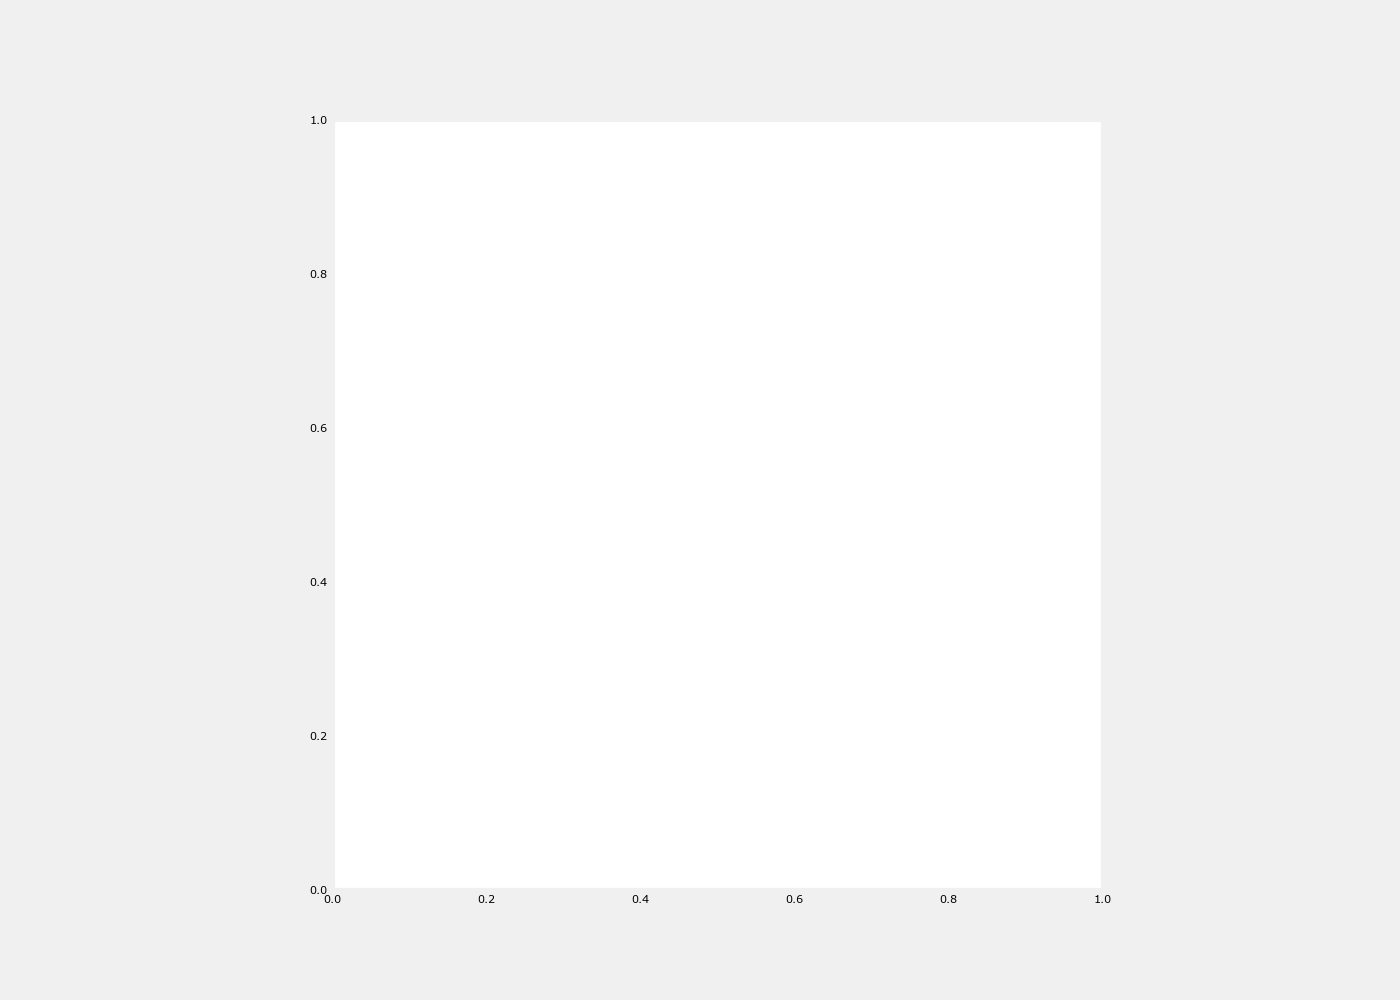

In [23]:
tree = []
build_tree_recursive(X_train, y_train, [0,1,2,3,4,5,6,7,8,9], "Root", max_depth=1, current_depth=0, tree = tree)
generate_tree_viz([0,1,2,3,4,5,6,7,8,9], y_train, tree)